In [2]:
import scipy as sc
import numpy as np
from scipy import interpolate
import sympy as sp
import matplotlib.pyplot as plt

In [5]:
x=np.array([1.1,1.2,1.4,1.5])
y=np.array([0.4,0.8,1.65,1.8])

In [6]:
f=interpolate.CubicSpline(x,y,bc_type='natural')
f

In [31]:
a = sp.Symbol('x')
f(a)

TypeError: can't convert expression to float

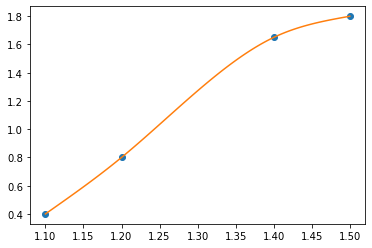

In [25]:
sx=np.linspace(1.1,1.5,100)
sy=f(sx)
plt.plot(x,y,'o',sx,sy)

In [23]:
f(1.25)

array(1.03359375)

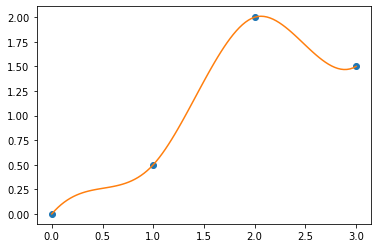

In [27]:
x=np.array([0,1,2,3])
y=np.array([0,0.5,2.0,1.5])
f=interpolate.CubicSpline(x,y,bc_type = ((1, 1.2), (1, 0.6)))
"""
bc_typestring or 2-tuple, optional
    Boundary condition type. Two additional equations, given by the boundary conditions, 
    are required to determine all coefficients of polynomials on each segment [2].

    If bc_type is a string, then the specified condition will be applied at both ends of a spline. 
    Available conditions are:
        ‘not-a-knot’ (default): The first and second segment at a curve end are the same polynomial. 
        It is a good default when there is no information on boundary conditions.
        
        ‘periodic’: The interpolated functions is assumed to be periodic of period x[-1] - x[0]. 
        The first and last value of y must be identical: y[0] == y[-1]. 
        This boundary condition will result in y'[0] == y'[-1] and y''[0] == y''[-1].
        
        ‘clamped’: The first derivative at curves ends are zero. Assuming a 1D y, 
        bc_type=((1, 0.0), (1, 0.0)) is the same condition.
        
        ‘natural’: The second derivative at curve ends are zero. Assuming a 1D y, 
        bc_type=((2, 0.0), (2, 0.0)) is the same condition.

    If bc_type is a 2-tuple, the first and the second value will be applied at the curve start and end respectively. 
    The tuple values can be one of the previously mentioned strings (except ‘periodic’) or a 
    tuple (order, deriv_values) allowing to specify arbitrary derivatives at curve ends:

    order: the derivative order, 1 or 2.

    deriv_value: array_like containing derivative values, shape must be the same as y, excluding axis dimension. 
    For example, if y is 1-D, then deriv_value must be a scalar. 
    If y is 3-D with the shape (n0, n1, n2) and axis=2, then deriv_value must be 2-D and have the shape (n0, n1).
"""
sx=np.linspace(0,3,100)
sy=f(sx)
plt.plot(x,y,'o',sx,sy)

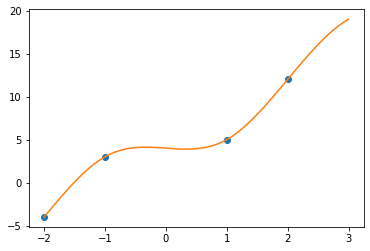

In [9]:
x=np.array([-2,-1,1,2])
y=np.array([-4,3,5,12])
f=interpolate.CubicSpline(x,y,bc_type='natural')

### in 'natural' mode, the second order differential of the boundary points are 0

sx=np.linspace(-2,3,100)
sy=f(sx)
plt.plot(x,y,'o',sx,sy)

In [10]:
f(0)

array(4.)

In [15]:
sx=np.linspace(-2,-1,100)
sy=f(sx)
coeff = np.polyfit(sx, sy, 3)
print(coeff)

[-1.5 -9.  -9.5  1. ]


In [16]:
sx=np.linspace(-1,1,100)
sy=f(sx)
coeff = np.polyfit(sx, sy, 3)
print(coeff)

[ 1.50000000e+00  2.55653124e-16 -5.00000000e-01  4.00000000e+00]


In [17]:
sx=np.linspace(1,2,100)
sy=f(sx)
coeff = np.polyfit(sx, sy, 3)
print(coeff)

[-1.5  9.  -9.5  7. ]
